In [18]:
# Importar librerias del proyecto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import requests
import os
from datetime import datetime

# Configuración de estilo de gráficos
sns.set(style="whitegrid")

ModuleNotFoundError: No module named 'ace_tools'

In [2]:
# Obtener nombre del CSV a analizar desde el txt generado por "data_extraction.py"
with open("C:/DataAnalysis/Eurostat/datafilecsv/latest_output.txt", "r") as file:
    csv_filename = file.read().strip()

# Mostrar el nombre del archivo CSV para verificar
print(f"Nombre del archivo CSV para analizar: {csv_filename}")


Nombre del archivo CSV para analizar: prc_hicp_manr_31-08-2024.csv


In [3]:
# Cargar el archivo CSV
df = pd.read_csv(f"C:/DataAnalysis/Eurostat/datafilecsv/{csv_filename}")

# Mostrar las primeras filas del dataframe
df.head()

,geo,time,value,index,coicop
0,BE,0,2.1,1997-01,All-items HICP
1,BE,1,1.9,1997-02,All-items HICP
2,BE,2,1.3,1997-03,All-items HICP
3,BE,3,1.1,1997-04,All-items HICP
4,BE,4,1.4,1997-05,All-items HICP


In [11]:
# Convertir la columna time a un formato de fecha
df['index'] = pd.to_datetime(df['index'], format='%Y-%m')

# Agregar una columna con el último día del mes
df['last_day_of_month'] = df['index'] + pd.offsets.MonthEnd(0)

# Mostrar las primeras filas del dataframe para verificar
df.head()

df.head()


,geo,time,value,index,coicop,last_day_of_month
0,BE,0,2.1,1997-01-01,All-items HICP,1997-01-31
1,BE,1,1.9,1997-02-01,All-items HICP,1997-02-28
2,BE,2,1.3,1997-03-01,All-items HICP,1997-03-31
3,BE,3,1.1,1997-04-01,All-items HICP,1997-04-30
4,BE,4,1.4,1997-05-01,All-items HICP,1997-05-31


In [4]:
# Describir los datos para obtener estadísticas generales
df.describe()

,time,value
count,96208.000000,96208.000000
mean,166.765425,2.512734
std,94.809257,4.428873
min,0.000000,-45.200000
25%,85.000000,0.500000
50%,167.000000,1.900000
75%,249.000000,3.800000
max,331.000000,84.700000


In [5]:
# Verificar valores nulos en el conjunto de datos
df.isnull().sum()

geo       0
time      0
value     0
index     0
coicop    0
dtype: int64

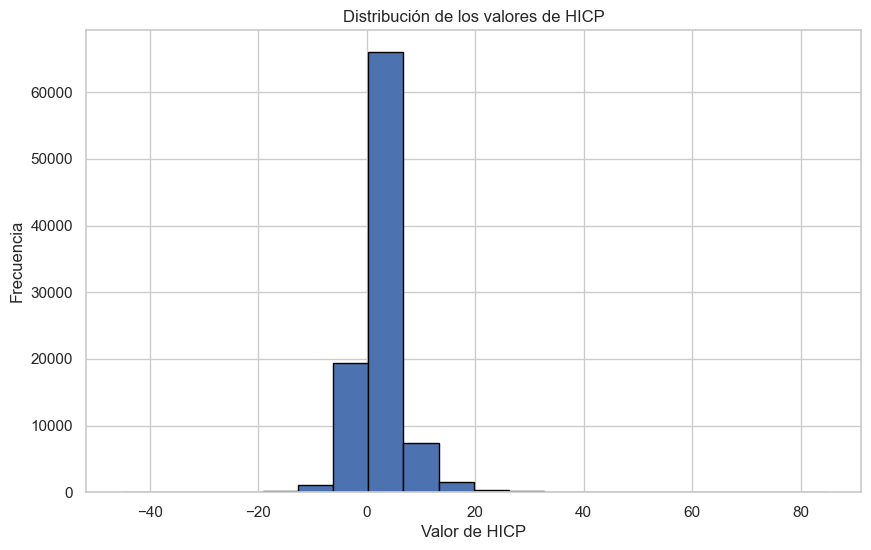

In [12]:
# Crear el histograma de la columna 'value'
plt.figure(figsize=(10, 6))
plt.hist(df['value'], bins=20, edgecolor='black')  # Puedes ajustar 'bins' para más o menos detalle
plt.title('Distribución de los valores de HICP')
plt.xlabel('Valor de HICP')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

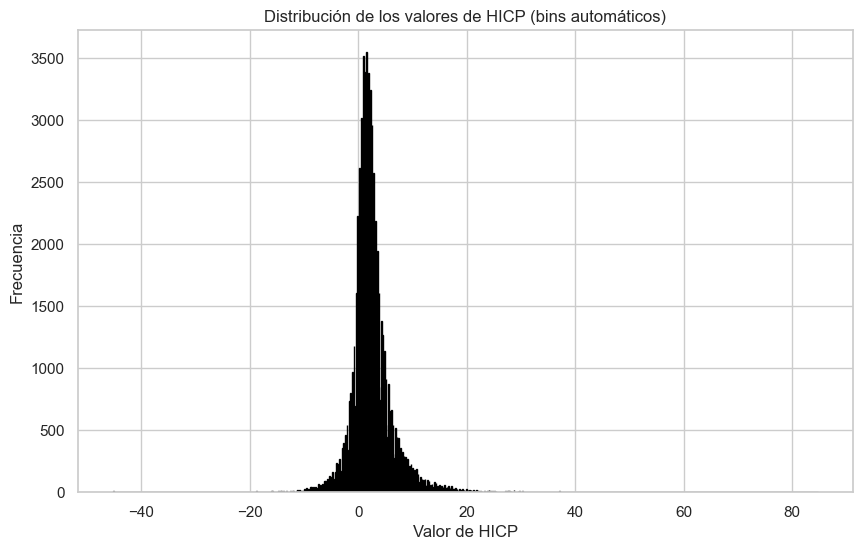

In [14]:
# Crear el histograma utilizando el método 'auto'
plt.figure(figsize=(10, 6))
plt.hist(df['value'], bins='auto', edgecolor='black')
plt.title('Distribución de los valores de HICP (bins automáticos)')
plt.xlabel('Valor de HICP')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


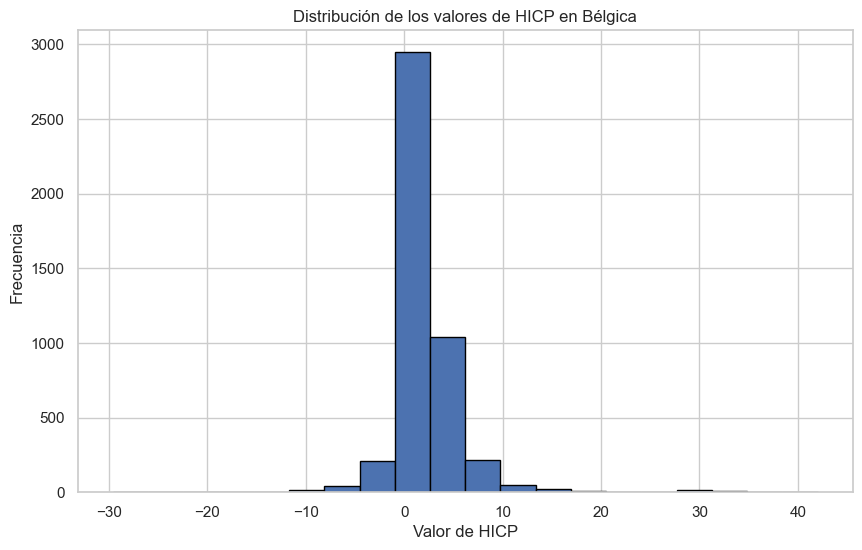

In [13]:
# Filtrar datos para Bélgica
df_be = df[df['geo'] == 'BE']

# Crear el histograma para Bélgica
plt.figure(figsize=(10, 6))
plt.hist(df_be['value'], bins=20, edgecolor='black')
plt.title('Distribución de los valores de HICP en Bélgica')
plt.xlabel('Valor de HICP')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

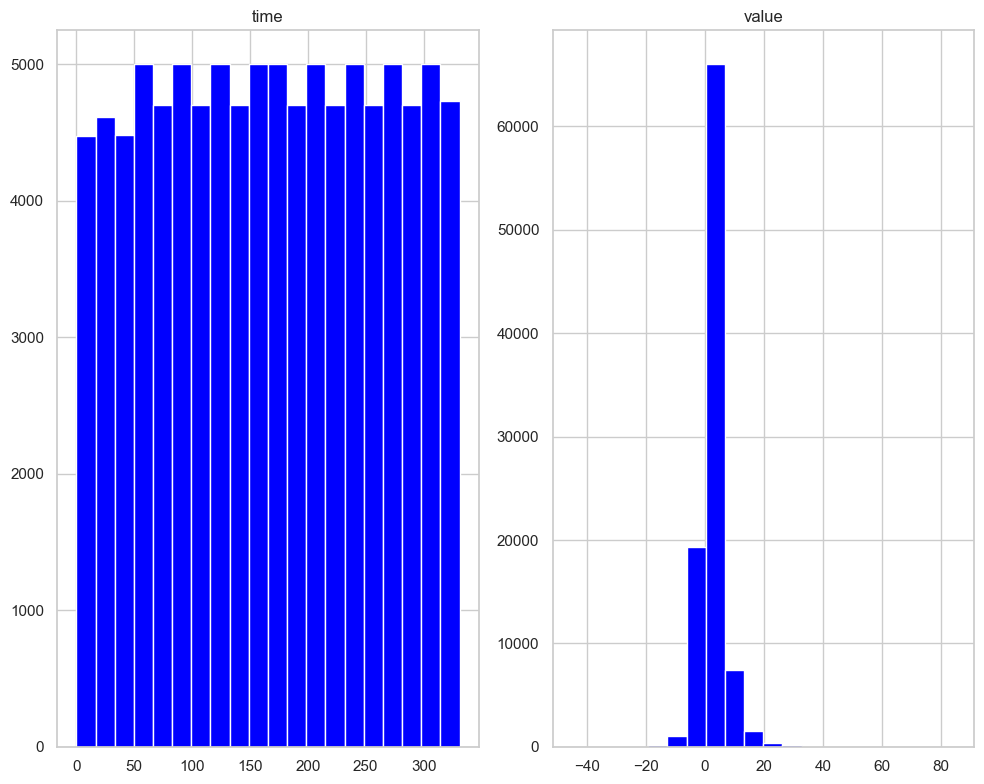

In [6]:
# Generar un histograma para las columnas numéricas
df.hist(figsize=(10, 8), bins=20, color='blue')
plt.tight_layout()
plt.savefig("histogram.png")  # Guardar el histograma
plt.show()

In [19]:
# Calcular el número de bins usando la regla de Sturges
num_bins_sturges = int(np.ceil(np.log2(len(df['value'])) + 1))

# Crear los rangos (bins)
bins = np.linspace(df['value'].min(), df['value'].max(), num_bins_sturges + 1)

# Asignar los valores de 'value' a los rangos
df['value_range'] = pd.cut(df['value'], bins=bins, include_lowest=True)

# Contar la frecuencia de los valores en cada rango
value_counts = df['value_range'].value_counts().sort_index()

# Crear una tabla de la distribución
distribution_table = pd.DataFrame(value_counts).reset_index()
distribution_table.columns = ['Range', 'Frequency']

# Mostrar la tabla
print(distribution_table)

                 Range  Frequency
0   (-45.201, -37.983]         12
1   (-37.983, -30.767]          0
2    (-30.767, -23.55]          5
3    (-23.55, -16.333]         42
4    (-16.333, -9.117]        415
5       (-9.117, -1.9]       5924
6        (-1.9, 5.317]      75440
7      (5.317, 12.533]      11839
8      (12.533, 19.75]       1837
9      (19.75, 26.967]        404
10    (26.967, 34.183]        183
11      (34.183, 41.4]         34
12      (41.4, 48.617]         28
13    (48.617, 55.833]         15
14     (55.833, 63.05]         11
15     (63.05, 70.267]          5
16    (70.267, 77.483]          1
17      (77.483, 84.7]         13


In [31]:
# Contar la cantidad de registros por 'geo'
geo_counts = df['geo'].value_counts().reset_index()
# Ordenar la cantidad de registros por 'geo' de mayor a menor
geo_counts_sorted = geo_counts.sort_values(by='count', ascending=False)

# Mostrar el resultado ordenado
print(geo_counts_sorted)

     geo  count
0     DE   4636
1     MT   4636
2     CY   4636
3     IT   4636
4     FR   4636
5     SK   4636
6     FI   4636
7     NL   4636
8     IE   4635
9     PT   4635
10    ES   4635
11    EE   4635
12    LT   4635
13    LV   4635
14    LU   4635
15    AT   4635
16    BE   4589
17    SI   4588
18  EA19   4587
19    HR   4300
20  EA20   3976


2024-08-01 00:00:00
      geo  time  value      index                              coicop  \
331    BE   331    4.5 2024-08-01                      All-items HICP   
663    DE   331    2.0 2024-08-01                      All-items HICP   
995    EE   331    3.4 2024-08-01                      All-items HICP   
1327   IE   331    1.1 2024-08-01                      All-items HICP   
1659   ES   331    2.4 2024-08-01                      All-items HICP   
1991   FR   331    2.2 2024-08-01                      All-items HICP   
2299   HR   331    3.0 2024-08-01                      All-items HICP   
2631   IT   331    1.3 2024-08-01                      All-items HICP   
2963   CY   331    2.2 2024-08-01                      All-items HICP   
3295   LV   331    0.9 2024-08-01                      All-items HICP   
3627   LT   331    0.7 2024-08-01                      All-items HICP   
3959   LU   331    1.7 2024-08-01                      All-items HICP   
4291   MT   331    2.5 2024-08-

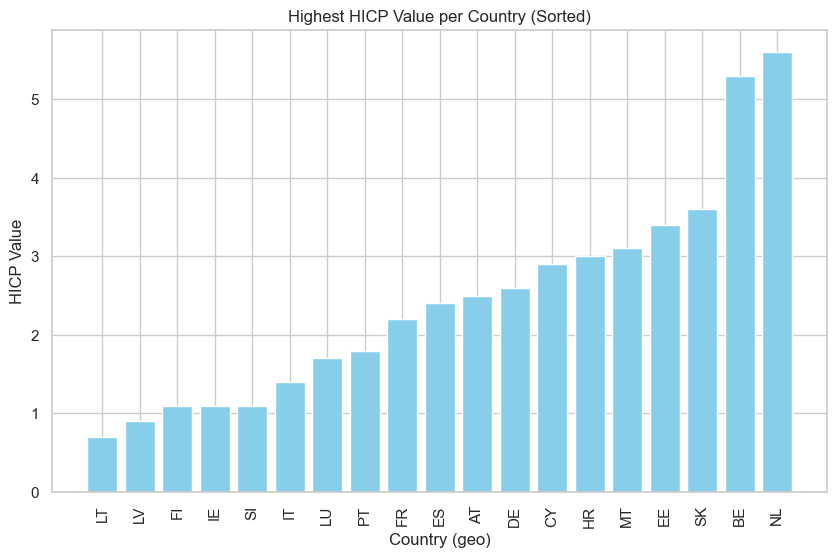

In [36]:
# Filtrar por el mayor 'last_day_of_month' disponible
last_day = df['index'].max()

print(last_day)

df_filtered = df[df['index'] == last_day]

print(df_filtered)

# Agrupar por 'geo' y obtener el valor máximo para cada país
df_grouped = df_filtered.groupby('geo')['value'].max().reset_index()

# Ordenar de menor a mayor por el valor máximo
df_sorted = df_grouped.sort_values(by='value', ascending=True)

# Crear el gráfico con los ejes invertidos
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['geo'], df_sorted['value'], color='skyblue')
plt.ylabel('HICP Value')
plt.xlabel('Country (geo)')
plt.title('Highest HICP Value per Country (Sorted)')
plt.xticks(rotation=90)  # Rotar etiquetas en el eje X si es necesario
plt.show()

In [33]:
# Filtrar por el mayor 'index' disponible
last_day = df['index'].max()
df_filtered = df[df['index'] == last_day]

# Agrupar por 'geo' y obtener el valor máximo para cada país
df_grouped = df_filtered.groupby('geo')['value'].max().reset_index()

# Ordenar de menor a mayor por el valor máximo
df_sorted = df_grouped.sort_values(by='value', ascending=True)

# Mostrar el DataFrame ordenado
df_sorted

,geo,value
11,LT,0.7
13,LV,0.9
6,FI,1.1
9,IE,1.1
17,SI,1.1
10,IT,1.4
12,LU,1.7
16,PT,1.8
7,FR,2.2
5,ES,2.4


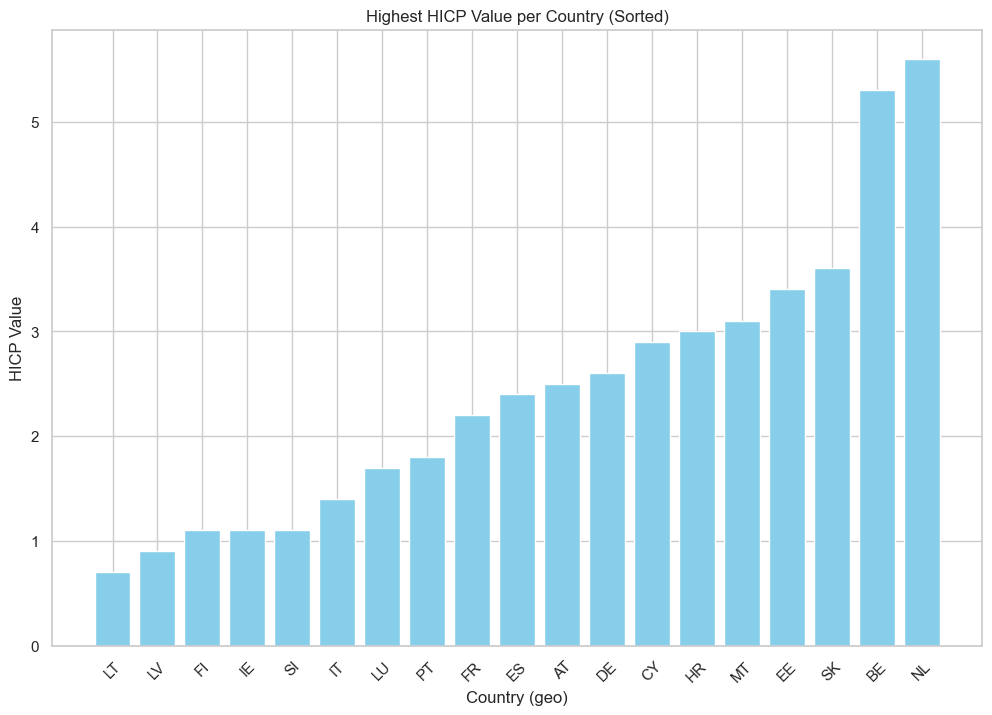

In [26]:
# Filtrar por el mayor 'last_day_of_month' disponible
last_day = df['last_day_of_month'].max()
df_filtered = df[df['last_day_of_month'] == last_day]

# Agrupar por 'geo' y obtener el valor máximo para cada país
df_grouped = df_filtered.groupby('geo')['value'].max().reset_index()

# Ordenar de menor a mayor por el valor máximo
df_sorted = df_grouped.sort_values(by='value', ascending=True)

# Crear el gráfico
plt.figure(figsize=(12, 8))
plt.bar(df_sorted['geo'], df_sorted['value'], color='skyblue')
plt.ylabel('HICP Value')
plt.xlabel('Country (geo)')
plt.title('Highest HICP Value per Country (Sorted)')
plt.xticks(rotation=45)
plt.show()


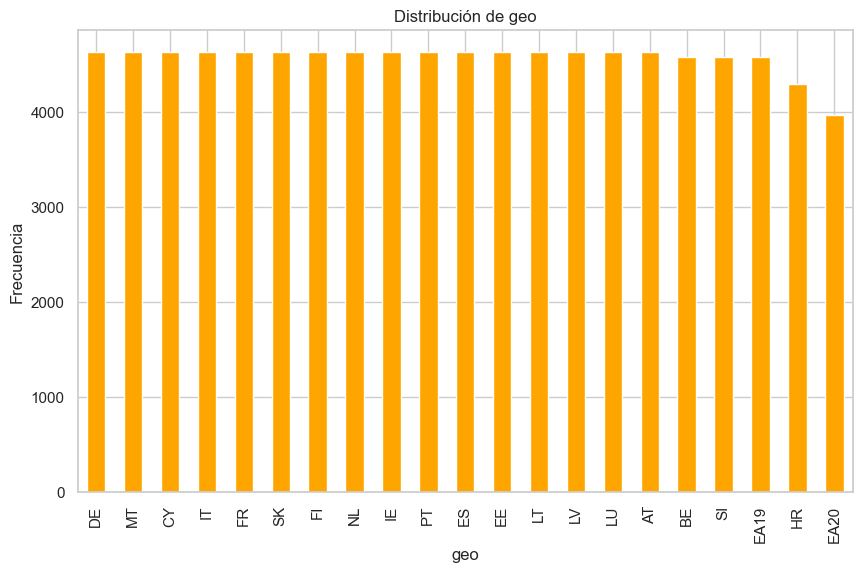

In [20]:
# Parametro a describir

tmpcolumna = 'geo'

# Crear un gráfico de barras para una categoría relevante
if tmpcolumna in df.columns:  # Reemplaza 'Category' con una columna categórica relevante
    df[tmpcolumna].value_counts().plot(kind='bar', color='orange', figsize=(10, 6))
    plt.title(f"Distribución de {tmpcolumna}")
    plt.xlabel(tmpcolumna)
    plt.ylabel('Frecuencia')
    plt.savefig("barplot.png")  # Guardar el gráfico de barras
    plt.show()